In [77]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [78]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Load in CIFAR-10 Dataset

In [152]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [153]:
# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

## Visualize a few images from the dataset

Note that the images from the CIFAR-10 dataset appear low resolution because each image is only 32x32. This helps us classify on these images without too much computing power.

In [154]:
x_train = x_train
y_train = y_train

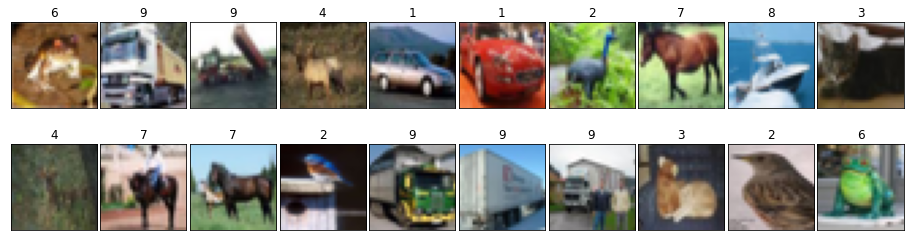

In [155]:
fig = plt.figure(figsize=(16, 80))

# Construct a grid to plot images
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 10),
                 axes_pad=(0.05, 0.5), 
                 )

for i in range(20):
    ax = grid[i]
    im = x_train[i]
    label = y_train[i].squeeze()
    
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
#     ax.set_title('{}'.format(class_names[label]))
    ax.set_title('{}'.format(label))

    ax.imshow(im)

plt.title('CIFAR-10 Images')
plt.show()

From examination, which categories do you think might be more or less difficult to classify?

## Preprocess images

Justify why preprocess

In [156]:
# Try preprocessing from 0 to 1 or centered around 0...
# Ravel to turn it into a vector
x_train = x_train / 255.0
x_test = x_test / 255.0

## Validation split

Use an 80/20 split

In [157]:
# Have them do this
# Maybe shuffle instead? 
VAL_SPLIT = 0.2
VAL_LENGTH = int(VAL_SPLIT * x_train.shape[0])

val_mask = np.zeros(x_train.shape[0], dtype=np.bool)
val_mask[np.random.choice(x_train.shape[0], VAL_LENGTH, replace=False)] = True

x_validation = x_train[val_mask]
x_train = x_train[~val_mask]


y_validation = y_train[val_mask]
y_train = y_train[~val_mask]

In [158]:
print(x_train.shape)

(40000, 32, 32, 3)


In [159]:
print(x_validation.shape)

(10000, 32, 32, 3)


## Define Model

In [160]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
])

Show some equation about crossentropy / explain the loss

In [161]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train Model

In [162]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1250/1250 [==============================] - 83s 66ms/step - loss: 2.1216 - accuracy: 0.3295
Epoch 2/5
1250/1250 [==============================] - 82s 66ms/step - loss: 2.0149 - accuracy: 0.4402
Epoch 3/5
1250/1250 [==============================] - 82s 65ms/step - loss: 1.9591 - accuracy: 0.4981
Epoch 4/5
1250/1250 [==============================] - 81s 65ms/step - loss: 1.9143 - accuracy: 0.5430
Epoch 5/5
1250/1250 [==============================] - 82s 66ms/step - loss: 1.8879 - accuracy: 0.5704


## Perform hyperparameter search -- either grid search or whatever

In [164]:
preds = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.9024 - accuracy: 0.5583


[1.9023945331573486, 0.5583000183105469]